# **INSTALLING AND IMPORTING LIBRARIES**

In [1]:
!pip install opencv-python

In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 35.1 MB/s eta 0:00:00


In [3]:
import easyocr
import cv2
import regex as re
from google.colab.patches import cv2_imshow
import pandas as pd

# **VISUALIZING THE BUSINESS CARD**

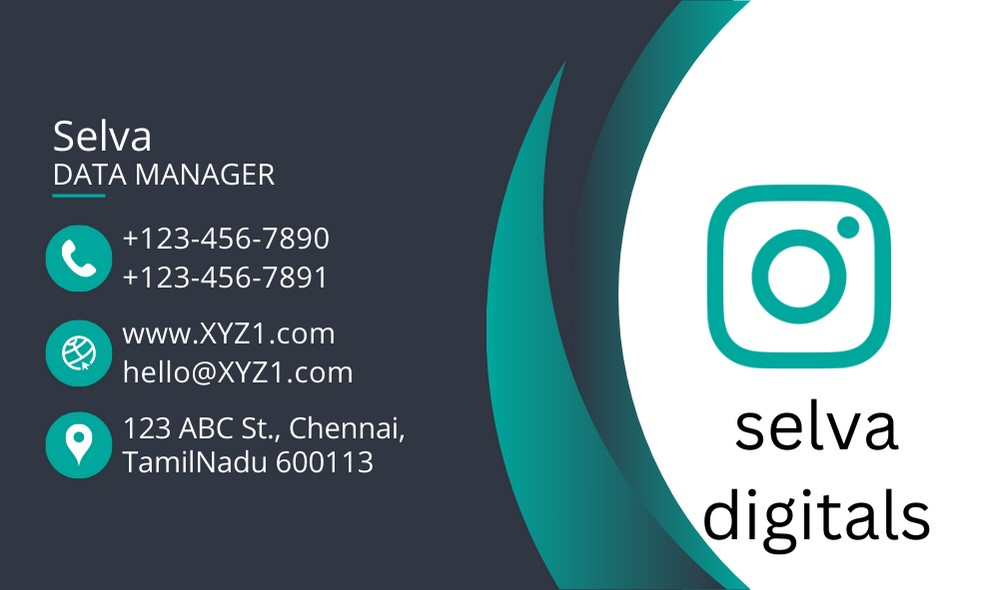

In [4]:
image1 = cv2.imread('Bizzcard1.jpg')
cv2_imshow(image1)

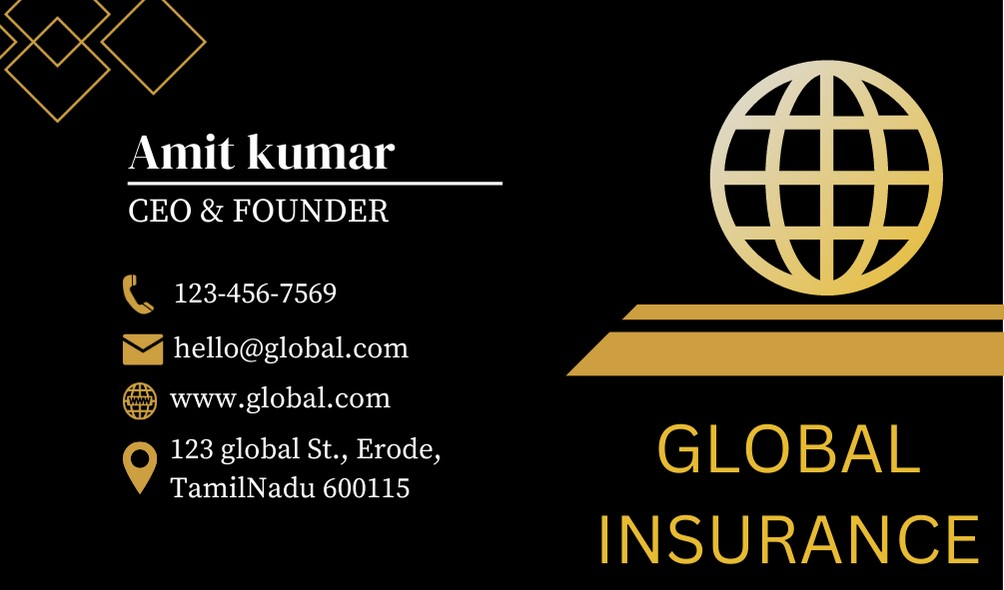

In [5]:
image2 = cv2.imread('Bizzcard2.jpg')
cv2_imshow(image2)

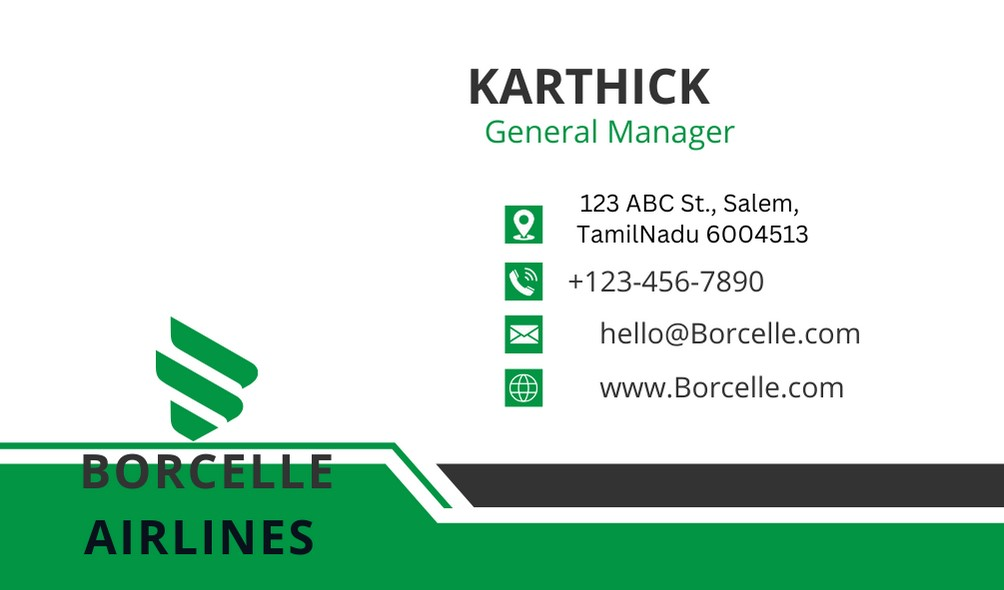

In [6]:
image3 = cv2.imread('Bizzcard3.jpg')
cv2_imshow(image3)

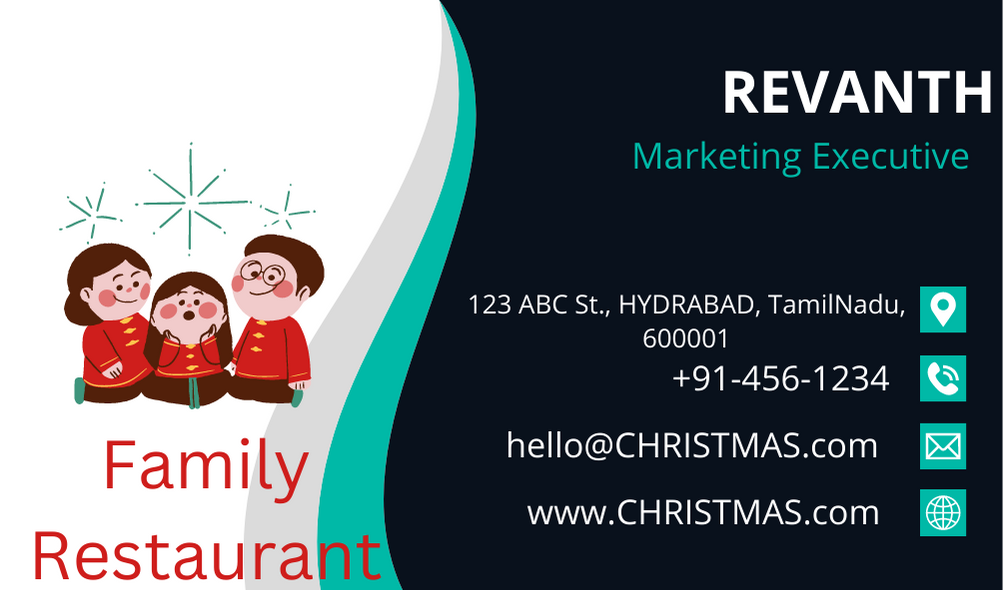

In [7]:
image4 = cv2.imread('Bizzcard4.png')
cv2_imshow(image4)

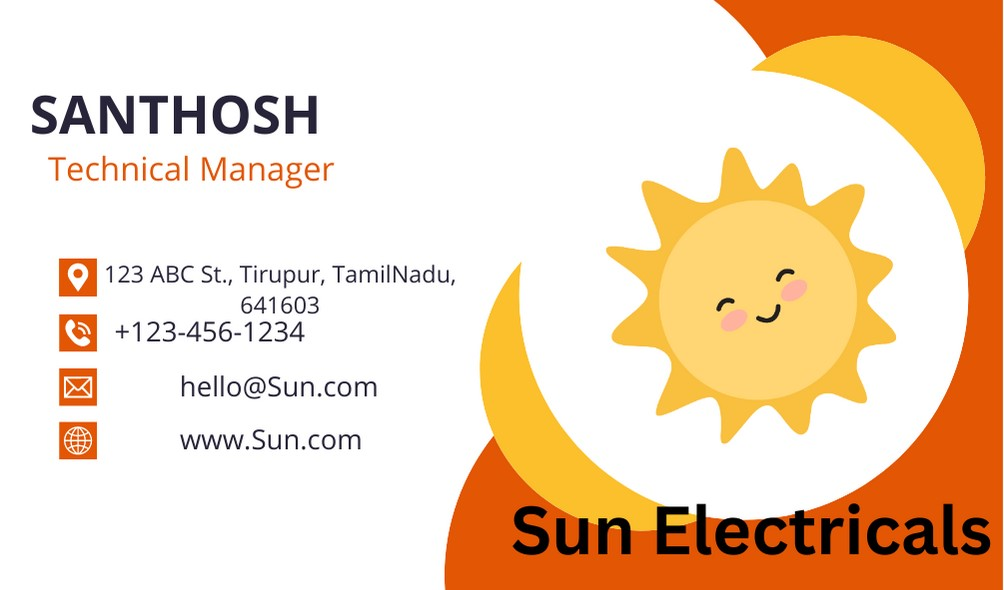

In [8]:
image5 = cv2.imread('Bizzcard5.jpg')
cv2_imshow(image5)

# **RUNNING EASYOCR**

In [9]:
reader=easyocr.Reader(['en'],gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

# **EXTRACTING WORDS BY EACH CARD**

In [10]:
result1 = reader.readtext(image1,detail=0)
print(result1)

['Selva', 'DATA MANAGER', '+123-456-7890', '+123-456-7891', 'WWW XYZI.com', 'hello@XYZ1.com', '123 ABC St,, Chennai,', 'selva', 'TamilNadu 600113', 'digitals']


In [11]:
result2 = reader.readtext(image2,detail=0)
print(result2)

['Amit kumar', 'CEO & FOUNDER', '123-456-7569', 'hello@global.com', 'WWW', 'global.com', '123 global', 'Erode,', 'GLOBAL', 'TamilNadu 600115', 'INSURANCE', 'St ,']


In [12]:
result3 = reader.readtext(image3,detail=0)
print(result3)

['KARTHICK', 'General Manager', '123 ABC St , Salem,', 'TamilNadu 6004513', '+123-456-7890', 'hello@Borcelle.com', 'wwW.Borcelle.com', 'BORCELLE', 'AIRLINES']


In [13]:
result4 = reader.readtext(image4,detail=0)
print(result4)

['REVANTH', 'Marketing Executive', '123 ABC St,, HYDRABAD, TamilNadu;', '600001', '+91-456-1234', 'hello@CHRISTMAS.com', 'Family', 'wwW.CHRISTMAS.com', 'Restaurant']


In [14]:
result5 = reader.readtext(image5,detail=0)
print(result5)

['SANTHOSH', 'Technical Manager', '123 ABC St,, Tirupur; TamilNadu,', '641603', '+123-456-1234', 'hello@Sun.com', 'www.Suncom', 'Sun Electricals']


# **REGEX PATTERN FOR PHONE NO**

In [15]:
def phno(img):
  num = []
  for i in img:
    if re.findall(r'^[+]',i):
      num.append(i)
    elif(re.findall(r'^\d{3}-\d{3}-\d{4}$',i)):
      num.append(i)
  return num

# **REGEX PATTERN FOR MAIL ID**

In [16]:
def email(img):
  for i in img:
    if(re.findall(r'[\w\.-]+@[\w\.-]+',i)):
      return i

# **REGEX PATTERN FOR WEBSITE**

In [17]:
def website(img):
  website = ""
  for i in img:
    if re.match(r'^WWW(?=.*\.com)', i):
      website = i
    elif re.match(r'^\w+\.com$', i):
      website = ('WWW.'+i)
  if len(website) ==0:
    website = "Not Available"
  else:
    return website

# **EXTRACTING NAME**

In [18]:
def name(img):
  for i in img:
    return i

# **EXTRACTING DESIGNATION**

In [19]:
def designation(img):
  for i in img:
    return img[1]

# **REGEX PATTERN FOR ADDRESS**

In [20]:
def address(img):
  for i in img:
    if(re.findall(r'^123+\s[\w\.-]+',i)):
      return i[0:10]

In [21]:
def domain(img):
  for i in img[-1]:
    if len(img[-1])> 5:
      return img[-1]
    else:
      return img[-2]


# **REGEX PATTERN FOR DISTRICT**

In [22]:
def district(img):
  for i in img:
    if(re.search(r'^123+\s',i)):
      if len(i[10:20])> 6:
        return i[11:20].replace(",","")
    elif (re.search(r'\bErode\b',i)):
      return i.replace(";","")
  return "Not Available"

# **REGEX PATTERN FOR PINCODE**

In [23]:
def pincode(img):
    pincode = None
    for i in img:
        pincode_match = re.search(r'(\d{6})|\b(\d{3}\s*\d{3})\b', i)
        if pincode_match:
            pincode = pincode_match.group(0).replace(' ', '')
    return pincode


# **REGEX PATTERN FOR STATE**

In [24]:
def state(img):
    for i in img:
        match = re.search(r'TamilNadu', i)
        if match:
            return match.group()
    return "Not found"

In [25]:
#create a dictionary with all the data
def data(img):
  data = {}
  data['Name'] = name(img)
  data['Designation'] = designation(img)
  data['Domain'] = domain(img)
  data['Contact'] = phno(img)
  data['E-mail'] = email(img)
  data['Website'] = website(img)
  data['Address'] = address(img)
  data['District'] = district(img)
  data['State'] = state(img)
  data['Pincode'] = pincode(img)
  return data

In [26]:
df_1 = pd.DataFrame(data(result1))
df_2 = pd.DataFrame(data(result2))
df_3 = pd.DataFrame(data(result3))
df_4 = pd.DataFrame(data(result4))
df_5 = pd.DataFrame(data(result5))

In [27]:
df = pd.concat([df_1,df_2,df_3,df_4,df_5])

In [28]:
df.to_csv('Extracted_data.csv',index=False)

extract_data=pd.read_csv('Extracted_data.csv')
extract_data

,Name,Designation,Domain,Contact,E-mail,Website,Address,District,State,Pincode
0,Selva,DATA MANAGER,digitals,+123-456-7890,hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,TamilNadu,600113
1,Selva,DATA MANAGER,digitals,+123-456-7891,hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,TamilNadu,600113
2,Amit kumar,CEO & FOUNDER,INSURANCE,123-456-7569,hello@global.com,WWW.global.com,123 global,"Erode,",TamilNadu,600115
3,KARTHICK,General Manager,AIRLINES,+123-456-7890,hello@Borcelle.com,NaN,123 ABC St,Salem,TamilNadu,600451
4,REVANTH,Marketing Executive,Restaurant,+91-456-1234,hello@CHRISTMAS.com,NaN,123 ABC St,HYDRABA,TamilNadu,600001
5,SANTHOSH,Technical Manager,Sun Electricals,+123-456-1234,hello@Sun.com,NaN,123 ABC St,Tirupur,TamilNadu,641603


# **CONNECTION TO SQL**

In [29]:
import sqlite3

In [30]:
connection = sqlite3.connect("bizzcard.db")

In [31]:
cursor = connection.cursor()

In [32]:
cursor.execute("CREATE TABLE IF NOT EXISTS bizzcard_extracted_data(id ,Name, Designation, Domain, Contact, Email, Website, Address, District, State, Pincode)")

In [33]:
extract_data.to_sql("bizzcard_extracted_data",connection,if_exists="replace",index=False)

6

In [34]:
connection.commit

<function Connection.commit()>

In [35]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables=cursor.fetchall()

In [36]:
for t in tables:
  print(t)

('bizzcard_extracted_data',)
